#### CLEANING
1. Basic info
2. Detect missing value
3. Handle missing value
4. Remove duplicates
5. Handle outliers
6. Export

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
# 1. BASIC INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Missing values in dataset are: Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


<Axes: >

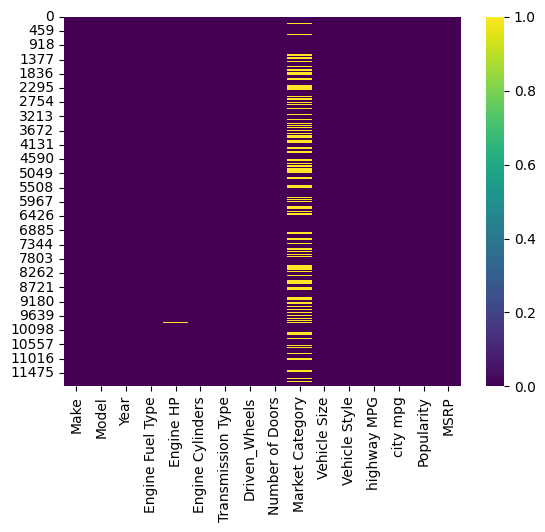

In [4]:
# 2. DETECT MISSING VALUES
print(f"Missing values in dataset are: {df.isnull().sum()}")
sns.heatmap(df.isnull(),cmap='viridis')

In [8]:
# 3. HANDLE MISSING VALUE
num_col = df.select_dtypes(include='number').columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

df[num_col] = df[num_col].fillna(df[num_col].median)
df[cat_col] = df[cat_col].fillna(df[cat_col].mode)

df.isnull().sum()  # VERIFYING

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [9]:
# 4.HANDLE DUPLICATES
df.duplicated().sum()              #715
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
# 5. HANDLE OUTLIERS
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

df = df[~((df[num_col]<Min) | (df[num_col]>Max)).any(axis=1)]

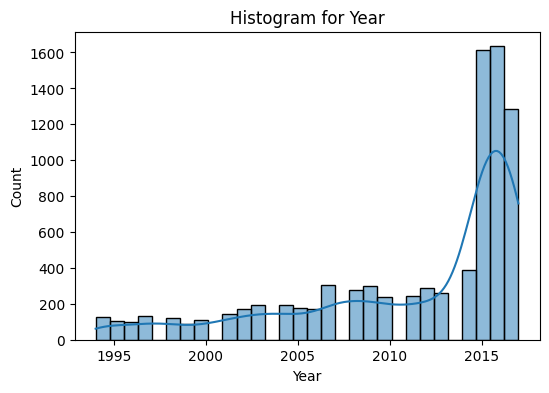

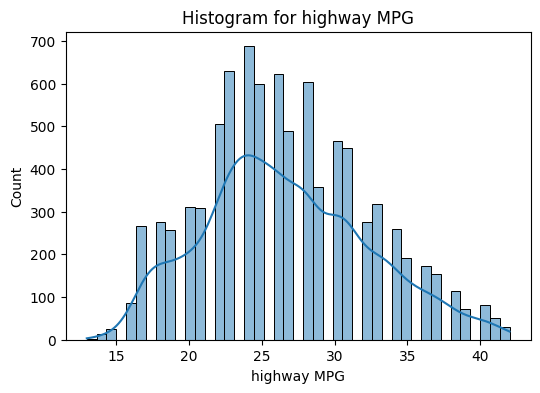

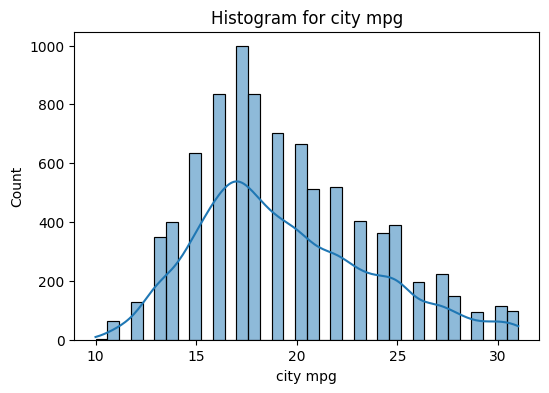

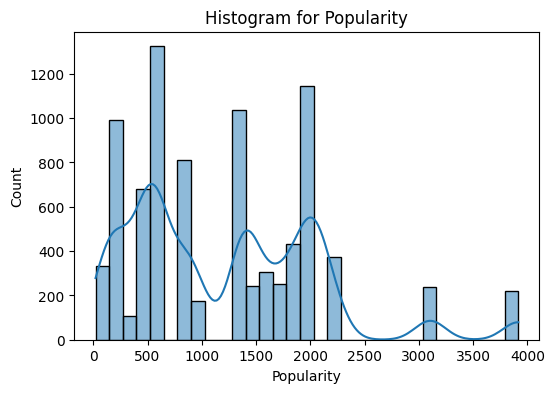

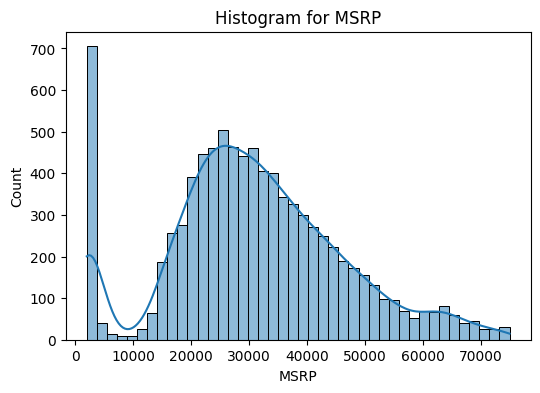

In [11]:
# 6. Visuals

for cols in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols],kde=True)
    plt.title(f"Histogram for {cols}")
    plt.show()

<Figure size 2000x400 with 0 Axes>

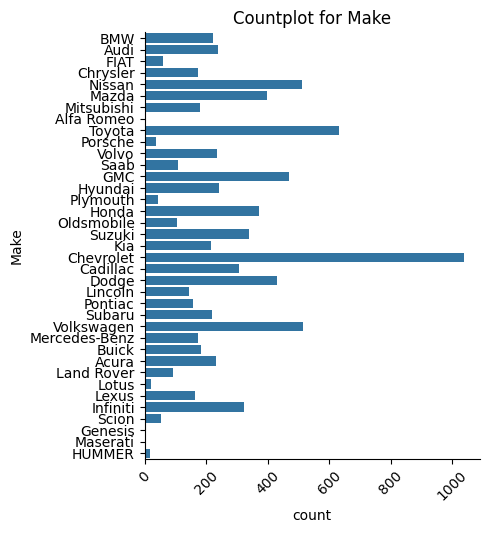

<Figure size 2000x400 with 0 Axes>

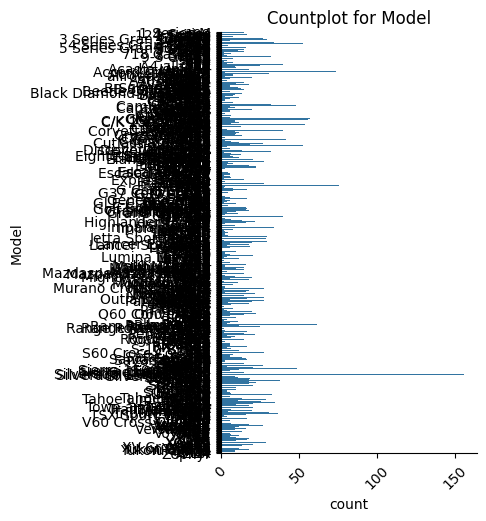

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

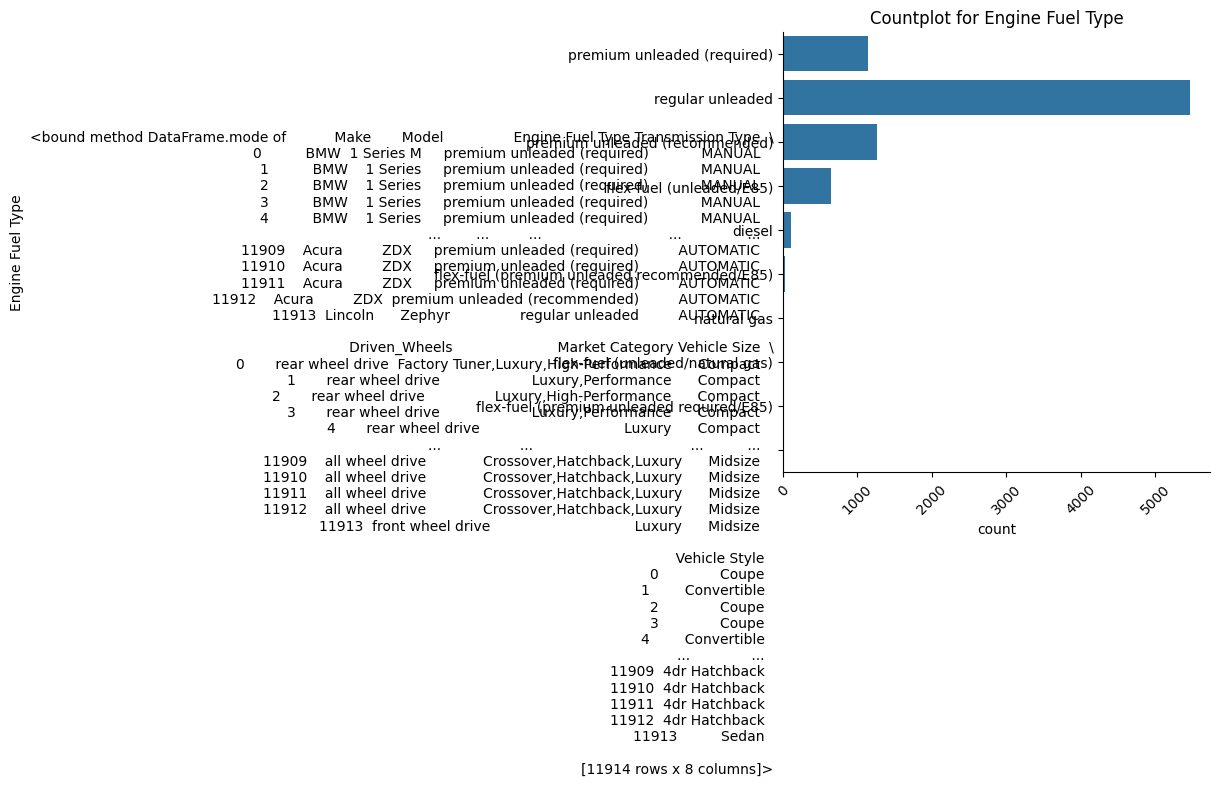

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

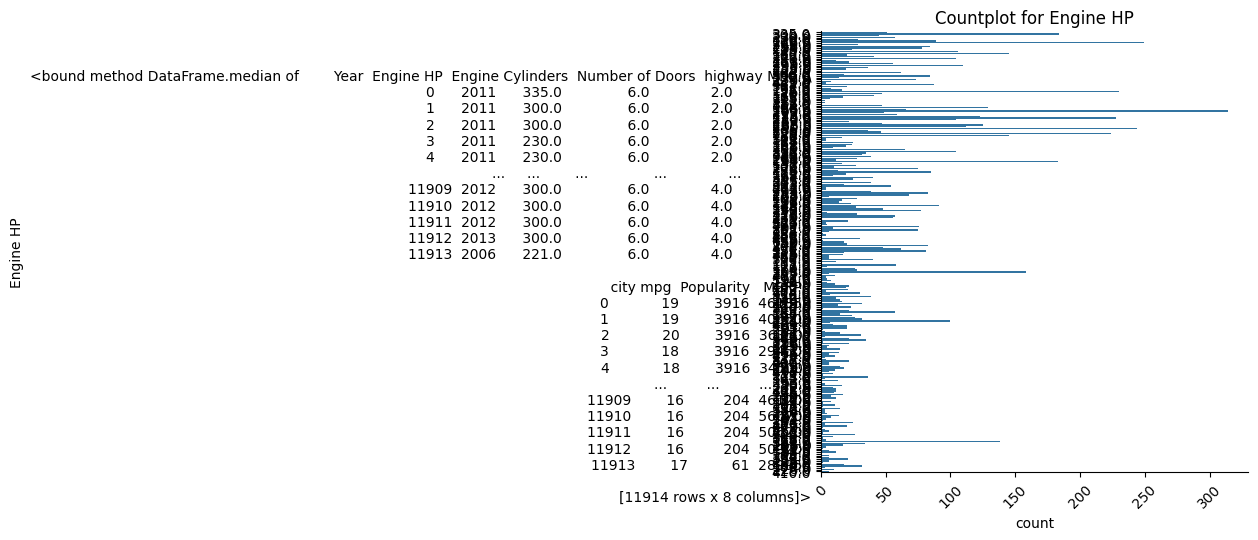

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

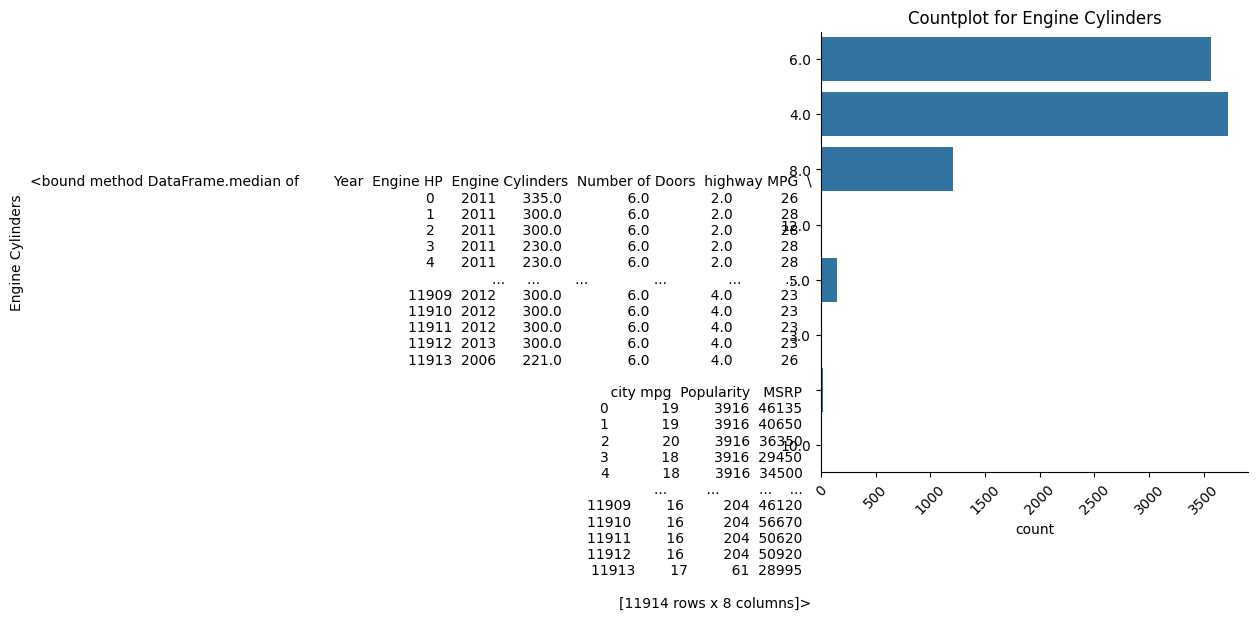

<Figure size 2000x400 with 0 Axes>

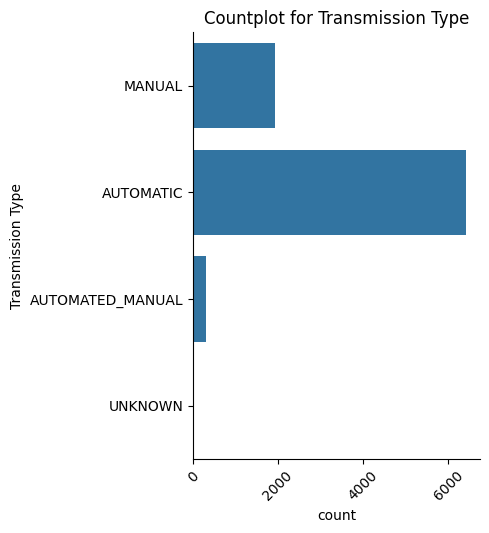

<Figure size 2000x400 with 0 Axes>

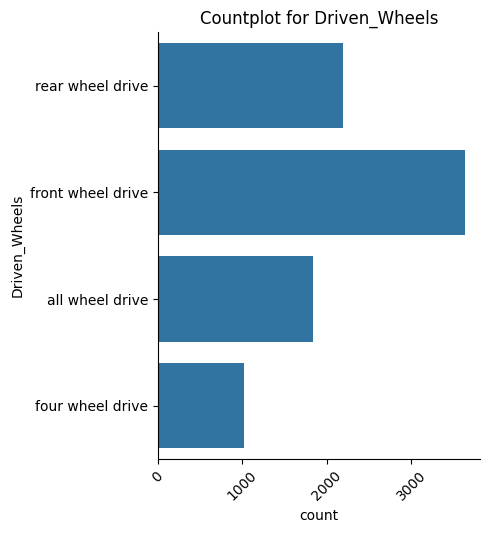

<Figure size 2000x400 with 0 Axes>

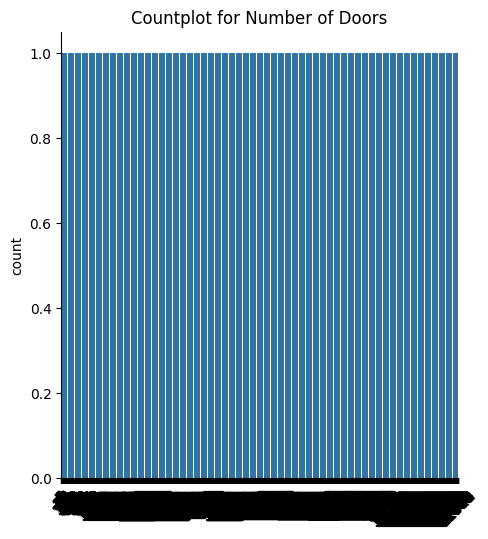

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

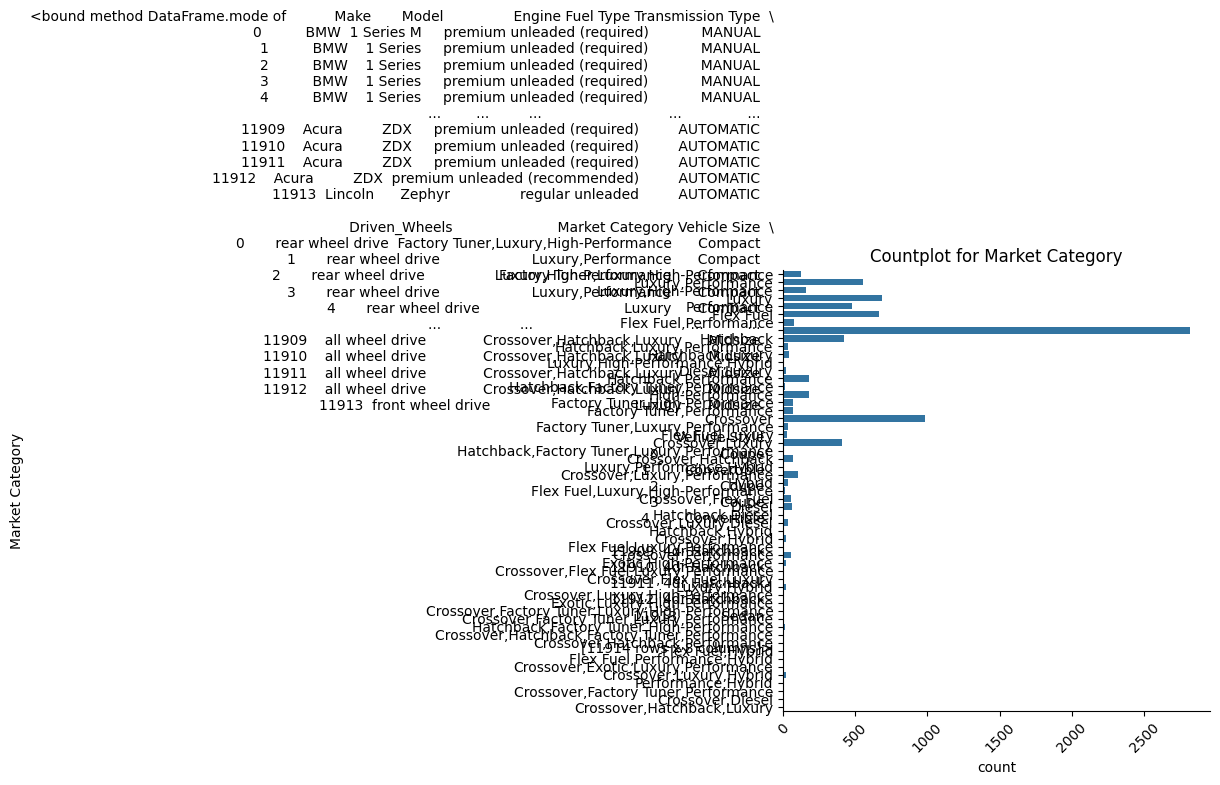

<Figure size 2000x400 with 0 Axes>

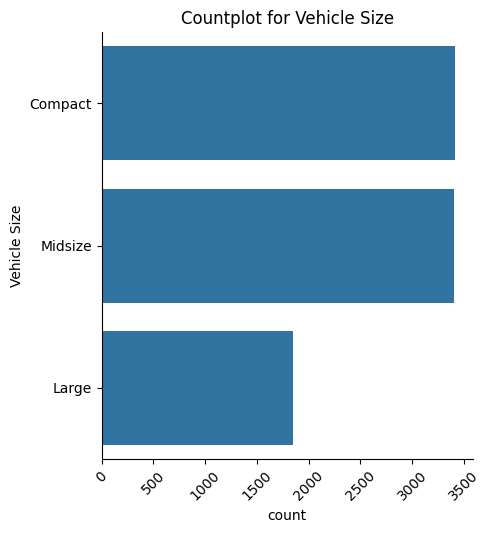

<Figure size 2000x400 with 0 Axes>

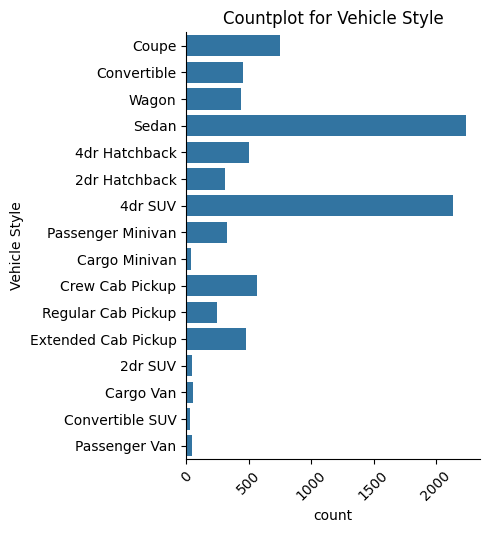

In [12]:
for col in cat_col:
    plt.figure(figsize=(50,4))
    sns.catplot(data=df[col],kind='count')
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
df.to_csv("Cleaned Dataset.csv",index=False)